In [2]:
%%HTML
<style type='text/css'>
    *{
        # background-color:#E3EDCD;
        # background-color:black;
        # color:white;
        
    }
    h1{
        color:#1976d2;
    }
    h2{
        color:#f57c00;
    }
    h3{
        color:#ba37ff;
    }
    
    h4{
        color:green;
    }
    table{
        border:1px solid black !important;
        border-collapse:collapse !important;
    }
     th{
        background-color:blueviolet !important;
        text-align:center !important;
        color:white;
    }
     th,td{
        border:0.1px solid black !important;
        text-align:center !important;
        transition:0.2s all liner !important;
        
    }
     td:hover{
        transform:scale(1.1);
        background-color:orange;
        color:blueviolet;
    }
    .raw{
        white-space:pre;
    }
    .atcenter{
        text-align:center !important;
    }
    .imp{
        color:red;
        font-weight:bolder;
    }
     table.tts tr:first-child td:nth-child(2){
        background-color:red !important;
    }
     table.tts tr:nth-child(2) td:last-child{
        background-color:red !important;
    }
</style>

## 5.6 专题：线性回归

如果说朴素贝叶斯（详情请参见 5.5 节）是解决分类任务的好起点，那
么线性回归模型就是解决回归任务的好起点。这些模型之所以大受欢
迎，是因为它们的拟合速度非常快，而且很容易解释。你可能对线性回
归模型最简单的形式（即对数据拟合一条直线）已经很熟悉了，不过经
过扩展，这些模型可以对更复杂的数据行为进行建模。            
本节将先快速直观地介绍线性回归问题背后的数学基础知识，然后介绍
如何对线性回归模型进行一般化处理，使其能够解决数据中更复杂的模
式。首先导入常用的程序库：

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

### 5.6.1 简单线性回归


首先来介绍最广为人知的线性回归模型——将数据拟合成一条直线。直
线拟合的模型方程为 $y = ax + b$，其中 a 是直线斜率，b 是直线截距。        
看看下面的数据，它们是从斜率为 2、截距为 -5 的直线中抽取的散点
（如图 5-42 所示）：

标准正态分布:
$$f(x)-u(\mu=0,\sigma^2=1)$$
其中$\mu$为总体均值(期望)$\sigma^2$为总体二阶中心距(方差)

$$y=2x-5+rng.randn(50)$$

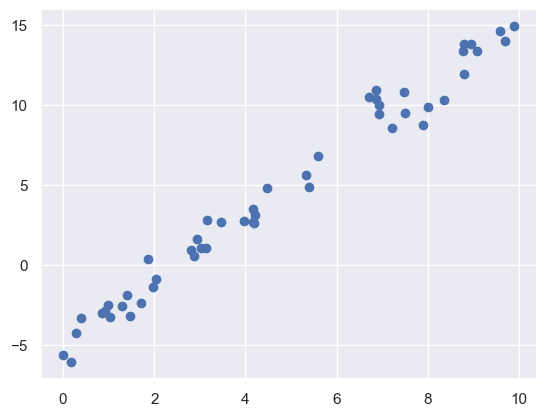

In [4]:
rng = np.random.RandomState(1) #默认生成0-1之间的随机数随机数种子为1
x = 10 * rng.rand(50) 
#np.random.RandomState().rand() 会生成一个或多个在 [0, 1) 区间内均匀分布的随机浮点数。
y = 2 * x - 5 + rng.randn(50)
'''
np.random.RandomState().randn() 生成的是 标准正态分布 
（均值为 0，标准差为 1）的随机数。
具体来说，它从一个标准正态分布 N(0,1)中抽样，结果可以是正数、负数，
甚至接近于 0 的值。'''
plt.scatter(x, y);

<p class='atcenter'>图 5-42：线性回归数据</p>

可以用 Scikit-Learn 的 LinearRegression 评估器来拟合数据，并获得
最佳拟合直线（如图 5-43 所示）：

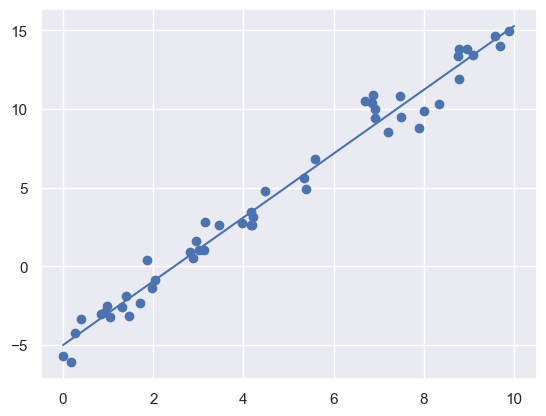

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True) 
model.fit(x[:, np.newaxis], y) #对模型进行拟合
xfit = np.linspace(0, 10, 1000) #构建新的数据
yfit = model.predict(xfit[:, np.newaxis]) #利用拟合的模型去预测数据
plt.scatter(x, y) #画出原始的数据
plt.plot(xfit, yfit); #画出拟合的线条

In [7]:
model

LinearRegression()

In [10]:
model?

Type:        LinearRegression
String form: LinearRegression()
File:        d:\venvs\ai\lib\site-packages\sklearn\linear_model\_base.py
Docstring:  
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set
    to `True`. ``None`` means 1 unless in a

<p class='atcenter'>图 5-43：线性回归模型</p>

数据的斜率和截距都在模型的拟合参数中，Scikit-Learn 通常会在参数
后面加一条下划线，即 coef_ 和 intercept_：

In [8]:
print("Model slope: ", model.coef_[0]) #coefficients 系数,斜率
print("Model intercept:", model.intercept_) #intercept 截距

Model slope:  2.0272088103606944
Model intercept: -4.9985770855532


可以看到，拟合结果与真实值非常接近，这正是我们想要的

然而，LinearRegression 评估器能做的可远不止这些——除了简单的
直线拟合，它还可以处理多维度的线性回归模型：


$$ y = a_0+a_1x_1+a_2x_2+...$$

里面有多个 x 变量。从几何学的角度看，这个模型是拟合三维空间中的
一个平面，或者是为更高维度的数据点拟合一个超平面。            
虽然这类回归模型的多维特性使得它们很难可视化，但是我们可以用
NumPy 的矩阵乘法运算符创建一些数据，从而演示这类拟合过程：           

In [9]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


其中 y 变量是由 3 个随机的 x 变量线性组合而成，线性回归模型还原了
方程的系数。

通过这种方式，就可以用一个 LinearRegression 评估器拟合数据的
回归直线、平面和超平面了。虽然这种方法还是有局限性，因为它将变
量限制在了线性关系上，但是不用担心，还有其他方法

### 5.6.2 基函数回归

你可以通过基函数对原始数据进行变换，从而将变量间的线性回归模型
转换为非线性回归模型。我们前面已经介绍过这个技巧，在 5.3 节和
5.4 节的 PolynomialRegression 管道示例中都有提及。这个方法的多
维模型是：


$$y=a_0+a_1x_1+a_2x_2+a_3x_3+...$$

其中一维的输入变量 x 转换成了三维变量 x1、x2、和 x3。让$x_n=f_n(x)$
，这里的 $f_n()$是转换数据的函数。

假如$f_n(x)=x^n$ ，那么模型就会变成多项式回归： 
$$y=a_0+a_1x+a_2x^2+a_3x^3+...$$
需要注意的是，这个模型仍然是一个线性模型，也就是说系数 $a_n$ 彼此
不会相乘或相除。我们其实是将一维的 x 投影到了高维空间，因此通过
线性模型就可以拟合出 x 与 y 间更复杂的关系。

01. 多项式基函数         
多项式投影非常有用，因此 Scikit-Learn 内置了
PolynomialFeatures 转换器实现这个功能：

In [11]:
from sklearn.preprocessing import PolynomialFeatures #引入原始特征
x = np.array([2,3,4])
poly = PolynomialFeatures(degree=3,include_bias=False) 
#include_bias=False：表示不包含偏置项（即常数项 1）。

In [12]:
poly

PolynomialFeatures(degree=3, include_bias=False)

In [13]:
x.shape

(3,)

In [17]:
x = x[:,np.newaxis]
x.shape

(3, 1)

In [18]:
poly.fit_transform(x) #为了和之前学的对应这里没有按照书上的写更方便理解

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

转换器通过指数函数，将一维数组转换成了三维数组。这个新的高
维数组之后可以放在多项式回归模型中。                 
就像在 5.4 节介绍的那样，最简洁的方式是用管道实现这些过程。
让我们创建一个 7 次多项式回归模型：

In [20]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(
    PolynomialFeatures(degree=7),LinearRegression()
)

数据经过转换之后，我们就可以用线性模型来拟合 x 和 y 之间更复
杂的关系了。例如，下面是一条带噪的正弦波（如图 5-44 所
示）：


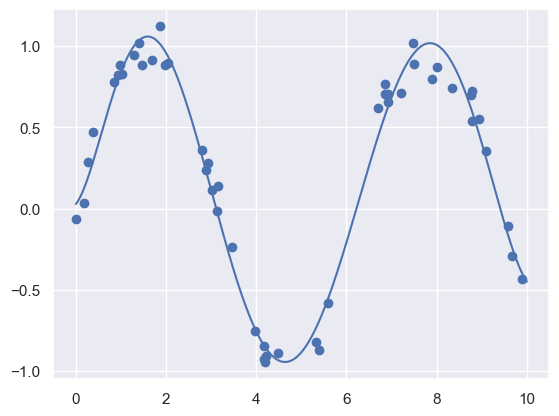

In [21]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

<p class='atcenter'>图 5-44：线性多项式回归模型拟合非线性训练数据</p>

通过运用 7 次多项式基函数，这个线性模型可以对非线性数据拟合
出极好的效果！

02. 高斯基函数         
当然还有其他类型的基函数。例如，有一种常用的拟合模型方法使
用的并不是一组多项式基函数，而是一组高斯基函数。最终结果如
图 5-45 所示。

<img src='../img/13.png'></img>
<p class='atcenter'>图 5-45：高斯基函数拟合非线性数据</p>

图 5-45 中的阴影部分代表不同规模基函数，把它们放在一起时就
会产生平滑的曲线。 Scikit-Learn 并没有内置这些高斯基函数，但
我们可以自己写一个转换器来创建高斯基函数，效果如图 5-46 所
示（Scikit-Learn 的转换器都是用 Python 类实现的，阅读 ScikitLearn 的源代码可能更好地理解它们的创建方式）：

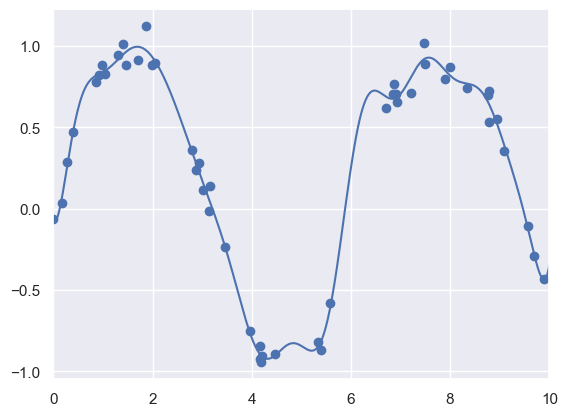

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
class GaussianFeatures(BaseEstimator, TransformerMixin):
# """一维输入均匀分布的高斯特征"""
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    def fit(self, X, y=None):
    # 在数据区间中创建N个高斯分布中心
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                self.width_, axis=1)
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

<p class='atcenter'>图 5-46：通过自定义转换器，实现高斯基函数拟合</p>

我们之所以将这个示例放在这里，是为了演示多项式基函数并不是
什么魔法：如果你对数据的产生过程有某种直觉，那么就可以自己
先定义一些基函数，然后像这样使用它们。

### 5.6.3 正则化

虽然在线性回归模型中引入基函数会让模型变得更加灵活，但是也很容
易造成过拟合（详情请参见 5.3 节）。例如，如果选择了太多高斯基函
数，那么最终的拟合结果看起来可能并不好（如图 5-47 所示）：


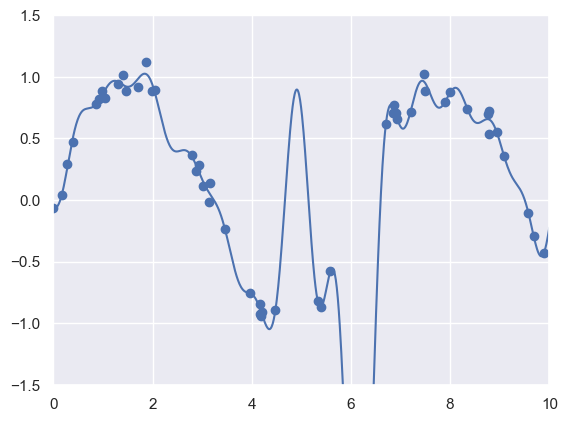

In [24]:
model = make_pipeline(GaussianFeatures(30),
                        LinearRegression())
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

<p class='atcenter'>图 5-47：一个过度复杂的模型对数据过拟合</p>

如果将数据投影到 30 维的基函数上，模型就会变得过于灵活，从而能
够适应数据中不同位置的异常值。如果将高斯基函数的系数画出来，就
可以看到过拟合的原因（如图 5-48 所示）：

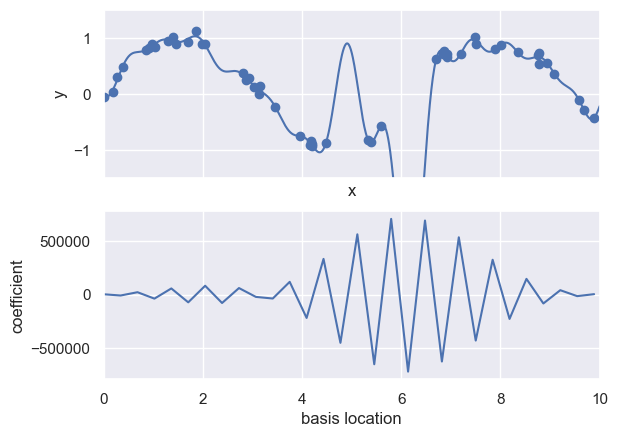

In [31]:
def basis_plot(model, title=None):
     fig, ax = plt.subplots(2, sharex=True)
     model.fit(x[:, np.newaxis], y)
     ax[0].scatter(x, y)
     ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
     ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
     if title:
         ax[0].set_title(title)
     ax[1].plot(model.steps[0][1].centers_,
         model.steps[1][1].coef_)
     ax[1].set(xlabel='basis location',
         ylabel='coefficient',
         xlim=(0, 10))
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

<p class='atcenter'>图 5-48：过度复杂的模型中高斯基函数的系数</p>

图 5-48 下面那幅图显示了每个位置上基函数的振幅。当基函数重叠的
时候，通常就表明出现了过拟合：相邻基函数的系数相互抵消。这显然
是有问题的，如果对较大的模型参数进行惩罚（penalize），从而抑制
模型剧烈波动，应该就可以解决这个问题了。这个惩罚机制被称为正则
化（regularization），有几种不同的表现形式。


01. 岭回归（$L_2$范数正则化）  
正则化最常见的形式可能就是岭回归（ridge regression，或者 L2 范
数正则化），有时也被称为吉洪诺夫正则化（Tikhonov
regularization）。其处理方法是对模型系数平方和（L2 范数）进行
惩罚，模型拟合的惩罚项为：
$$P=\alpha\sum_{n=1}^N\theta_n^2$$
其中，α 是一个自由参数，用来控制惩罚的力度。这种带惩罚项的
模型内置在 Scikit-Learn 的 Ridge 评估器中（如图 5-49 所示）：

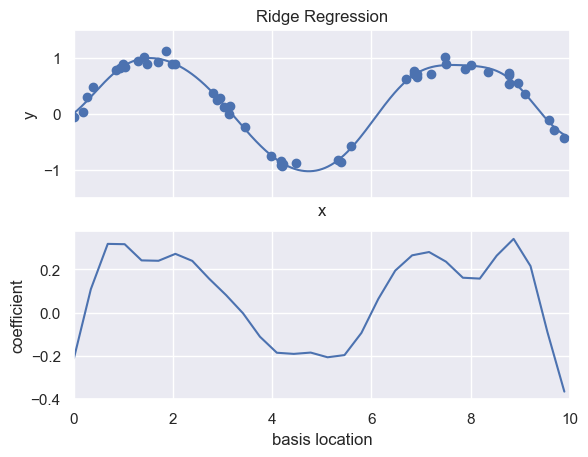

In [32]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

<p class='atcneter'>图 5-49：岭回归（L<sub>2</sub> 范数）正则化处理过度复杂的模型（与图 5-
48 对比）</p>

参数 α 是控制最终模型复杂度的关键。如果 α → 0，那么模型就恢
复到标准线性回归结果；如果 α →∞，那么所有模型响应都会被压
制。岭回归的一个重要优点是，它可以非常高效地计算——因此相
比原始的线性回归模型，几乎没有消耗更多的计算资源。

02. Lasso正则化（$L_1$范数）

另一种常用的正则化被称为 Lasso，其处理方法是对模型系数绝对
值的和（L1 范数）进行惩罚： 
$$P=\alpha\sum_{n=1}^N|\theta_n|$$ $P(unishment) $
虽然它在形式上非常接近岭回归，但是其结果与岭回归差别很大。
例如，由于其几何特性，Lasso 正则化倾向于构建稀疏模型；也就
是说，它更喜欢将模型系数设置为 0。   
可以看到如图 5-49 所示的结果，但是用模型系数的 L1- 范数正则
化实现的（如图 5-50 所示）：


D:\venvs\ai\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


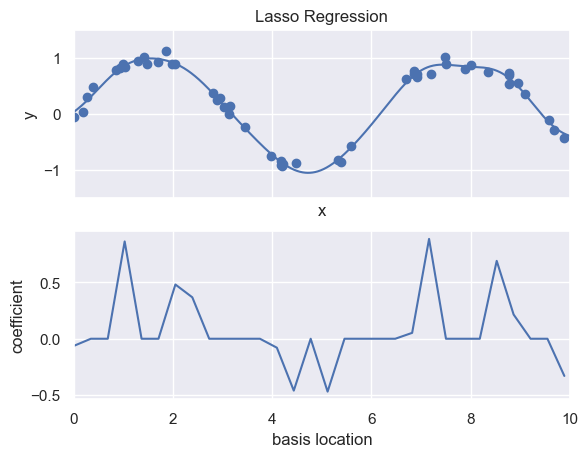

In [33]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

<p class='atcenter'>图 5-50：Lasso（$L_1$ 范数）正则化处理过度复杂的模型（与图 5-
48 对比）</p>

### 5.6.4 案例：预测自行车流量

下面来尝试预测美国西雅图弗雷蒙特桥的自行车流量，数据源自不同天
气、季节和其他条件下通过该桥的自行车统计数据。我们在 3.12 节见
过这些数据。                       
在本节中，我们将自行车数据与其他数据集连接起来，确定哪些天气和
季节因素（温度、降雨量和白昼时间）会影响通过这座桥的自行车流
量。NOAA 已经提供了每日的站点天气预报
（http://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND）数据
（我用的站点 ID 是 USW00024233），可以用 Pandas 轻松将两份数据
连接起来。然后，创建一个简单的线性回归模型来探索与自行车数量相
关的天气和其他因素，从而评估任意一种因素对骑车人数的影响。                 
值得注意的是，这是一个演示在统计模型框架中如何应用 Scikit-Learn
工具的案例，模型参数被假设为具有可以解释的含义。就像前面介绍过
的那样，虽然这并不是一个介绍标准机器学习方法的案例，但是对模型
的解释在其他模型中也会用到。
首先加载两个数据集，用日期作索引：

In [41]:
import pandas as pd
counts = pd.read_csv('../data/processed_data.csv',
                     index_col=0,
                     parse_dates=True)
# weather = pd.read_csv('599021.csv', index_col='DATE', parse_dates=True)

C:\Users\20201\AppData\Local\Temp\ipykernel_11496\4220579422.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  counts = pd.read_csv('../data/processed_data.csv',


In [42]:
counts.head()

,Date,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,DayLightHrs,AvgTempInC,PRCP_IN,DryDay,YearsCount
0,2012-10-03,3521.0,0,0,1,0,0,0,0,0,11.277359,5.60,0.0,1,0.000000
1,2012-10-04,3475.0,0,0,0,1,0,0,0,0,11.219142,5.65,0.0,1,0.002740
2,2012-10-05,3148.0,0,0,0,0,1,0,0,0,11.161038,5.95,0.0,1,0.005479
3,2012-10-06,2006.0,0,0,0,0,0,1,0,0,11.103056,6.05,0.0,1,0.008219
4,2012-10-07,2142.0,0,0,0,0,0,0,1,0,11.045208,6.05,0.0,1,0.010959


In [43]:
weather = pd.read_csv('../data/1404899.csv', index_col='DATE', parse_dates=True)

In [44]:
weather.head()

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WT02,WT03,WT04,WT05,WT08,WT13,WT14,WT16,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2012-10-03,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",16.33,NaN,0.0,0.0,0.0,NaN,66,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-04,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",14.54,NaN,0.0,0.0,0.0,NaN,66,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-05,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",12.75,NaN,0.0,0.0,0.0,NaN,71,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-06,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",11.41,NaN,0.0,0.0,0.0,NaN,75,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-07,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2.91,NaN,0.0,0.0,0.0,NaN,75,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


然后计算每一天的自行车流量，将结果放到一个新的 DataFrame 中：

In [46]:
counts.resample?

Signature:
counts.resample(
    rule,
    axis: 'Axis | lib.NoDefault' = <no_default>,
    closed: "Literal['right', 'left'] | None" = None,
    label: "Literal['right', 'left'] | None" = None,
    convention: "Literal['start', 'end', 's', 'e'] | lib.NoDefault" = <no_default>,
    kind: "Literal['timestamp', 'period'] | None | lib.NoDefault" = <no_default>,
    on: 'Level | None' = None,
    level: 'Level | None' = None,
    origin: 'str | TimestampConvertibleTypes' = 'start_day',
    offset: 'TimedeltaConvertibleTypes | None' = None,
    group_keys: 'bool_t' = False,
) -> 'Resampler'
Docstring:
Resample time-series data.

Convenience method for frequency conversion and resampling of time series.
The object must have a datetime-like index (`DatetimeIndex`, `PeriodIndex`,
or `TimedeltaIndex`), or the caller must pass the label of a datetime-like
series/index to the ``on``/``level`` keyword parameter.

Parameters
----------
rule : DateOffset, Timedelta or str
    The offset string or obj

In [47]:
daily = counts.resample('d')
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # 去掉其余的列

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

在之前的分析中，我们发现同一周内每一天的模式都是不一样的。因
此，我们在数据中加上 7 列 0~1 值表示星期几：

```ipython
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
daily[days[i]] = (daily.index.dayofweek == i).astype(float)
```

我们觉得骑车人数在节假日也有所变化。因此，再增加一列表示当天是
否为节假日：

```ipython
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

```

我们还认为白昼时间也会影响骑车人数。因此，用标准的天文计算来添
加这列信息（如图 5-51 所示）：

```ipython
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """计算指定日期的白昼时间"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
    * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.
daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot();
```
